## CSU Theory Group Coding Camp, Fall 2022
### PCA Analysis of Dogs and Cats
#### 09/14/2022

In this excerise, we'll use PCA to analyze a dataset comprised of images of dogs and cats. We'll find the "principal dogs" and "principal cats", and quantify the variance captured by each.

The dataset consists of 99 images of cats, and 99 images of dogs. Each image is 64x64 pixels.

In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [44]:
data = np.loadtxt('./dogs_and_cats.csv', delimiter = ',')
print(data.shape)
data

(4096, 198)


array([[ 23., 250., 137., ...,  66., 245., 197.],
       [ 23., 250., 137., ...,  61., 245., 199.],
       [ 20., 250., 137., ...,  57., 245., 195.],
       ...,
       [ 31., 244., 102., ...,  77., 107., 166.],
       [ 23., 232., 124., ...,  78., 103., 170.],
       [  9., 244., 124., ...,  78.,  87., 171.]])

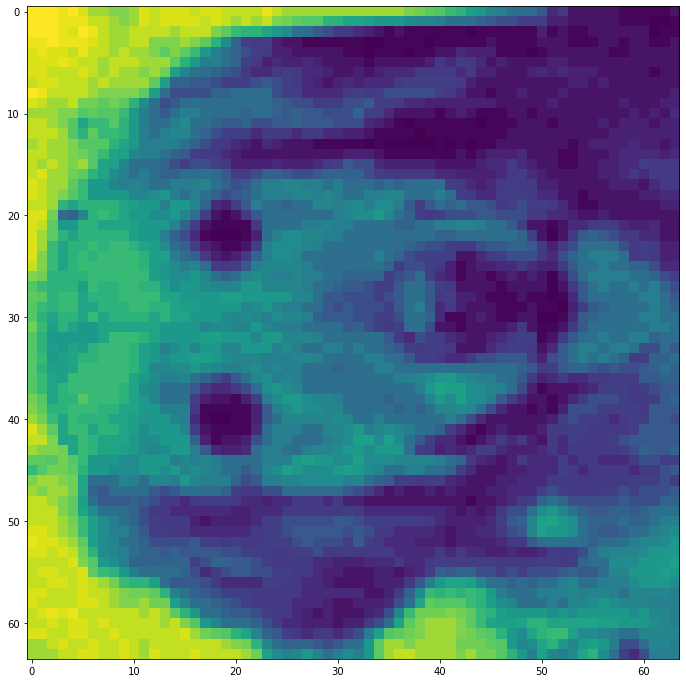

In [47]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax = plt.imshow(data[:, 99].reshape((64, 64)))
plt.show()

First, we need to break our dataset into the cats and the dogs. Then, we'll mean-center each dataset

In [48]:
cats = np.array(data[:, :99])
dogs = np.array(data[:, 99:])
print(cats.shape)

(4096, 99)


In [49]:
cats = cats - np.mean(cats, axis = 1).reshape((4096, 1))
dogs = dogs - np.mean(dogs, axis = 1).reshape((4096, 1))
cats

array([[ -91.49494949,  135.50505051,   22.50505051, ...,   28.50505051,
         108.50505051,  -13.49494949],
       [ -87.87878788,  139.12121212,   26.12121212, ...,   27.12121212,
         113.12121212,   -3.87878788],
       [ -91.85858586,  138.14141414,   25.14141414, ...,   41.14141414,
         113.14141414,   -5.85858586],
       ...,
       [ -86.64646465,  126.35353535,  -15.64646465, ...,   19.35353535,
          62.35353535,   -3.64646465],
       [ -93.98989899,  115.01010101,    7.01010101, ...,   -1.98989899,
          65.01010101,  -25.98989899],
       [-108.11111111,  126.88888889,    6.88888889, ...,   -4.11111111,
          59.88888889,   -4.11111111]])

Now, multiply each by it's transpose, and do the SVD to get the princple axes

In [50]:
c_act = (1/98) * np.matmul(cats, cats.T)
d_act = (1/98) * np.matmul(dogs, dogs.T)

In [51]:
u_c, s_c, v_h_c = np.linalg.svd(c_act)
u_d, s_d, v_h_d = np.linalg.svd(d_act)

First principal cat

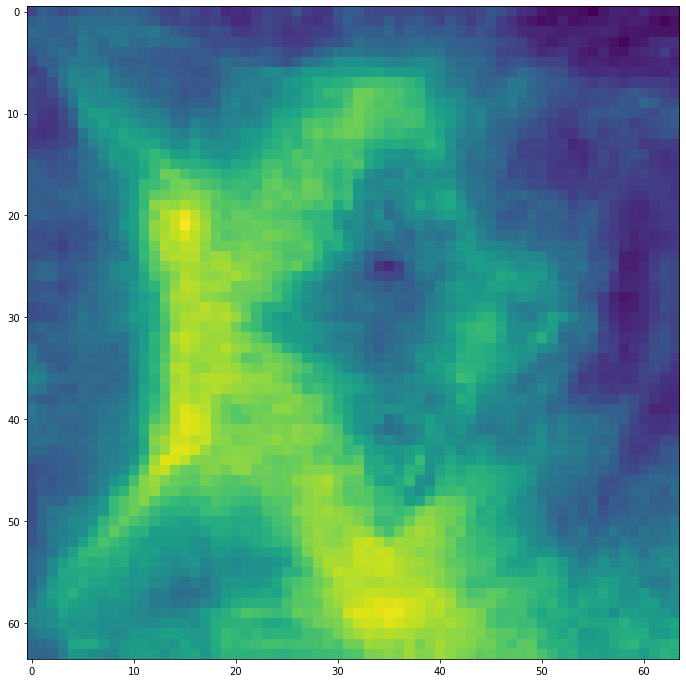

In [53]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax = plt.imshow(u_c[:, 0].reshape((64, 64)))
ax = plt.imshow(u_c[:, 1].reshape((64, 64)))
ax = plt.imshow(u_c[:, 2].reshape((64, 64)))
ax = plt.imshow(u_c[:, 3].reshape((64, 64)))

Now, lets look at the amount of variance captured by each principal cat. All we have to do is plot the magnitude of the components of S

Text(0, 0.5, 'Value')

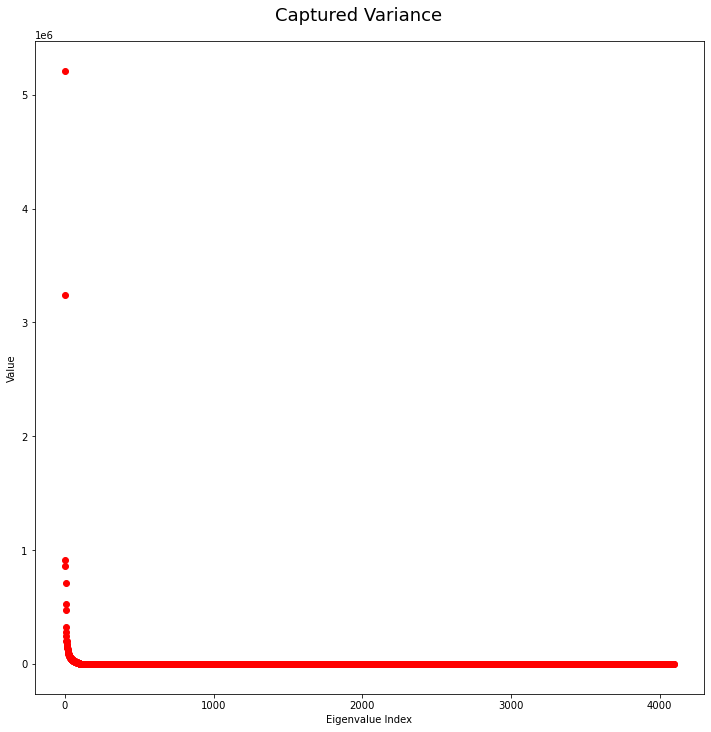

In [54]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax = plt.scatter(range(len(s_c)), s_c, color="red")
fig.suptitle('Captured Variance', y = 0.92, fontsize = 18)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

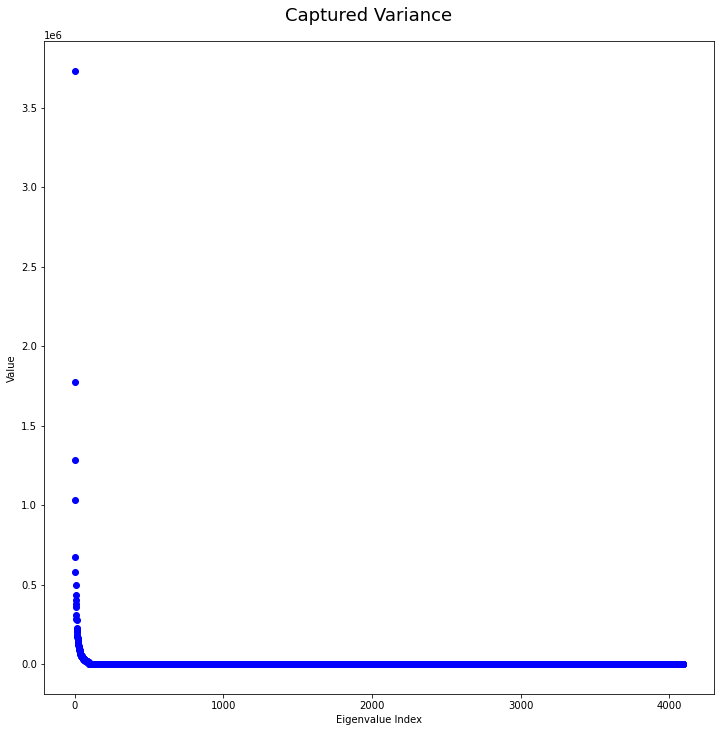

In [34]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
ax = plt.scatter(range(len(s_d)), s_d, color='blue')
fig.suptitle('Captured Variance', y = 0.92, fontsize = 18)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')

Lastly, how many principal cats/dogs are required to capture 95% of the variance of the dataset?

In [41]:
sum_sc = np.sum(s_c)
i = 0
for ind, eig in enumerate(s_c):
    i += eig
    if i/sum_sc > 0.95:
        print('Terms required for 95% variance capture: ' + str(ind))
        break

Terms required for 95% variance capture: 52


In [42]:
sum_sd = np.sum(s_d)
i = 0
for ind, eig in enumerate(s_d):
    i += eig
    if i/sum_sd > 0.95:
        print('Terms required for 95% variance capture: ' + str(ind))
        break

Terms required for 95% variance capture: 57
